In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Importing Data
customer_churn = pd.read_csv("C:/Users/BDA/Downloads/lab7_data.csv", sep ="\t")
customer_churn.head()

,Unnamed: 0,contract_id,cnt_blocks_1m,cnt_blocks_2m,cnt_blocks_3m,cnt_blocks_2m_sum,cnt_blocks_3m_sum,ratio_cnt_blocks_2m,ratio_cnt_blocks_3m,avg_block_3m,...,avg_daily_traffic_4w,avg_traffic_per_session_1m,avg_traffic_per_session_2m,avg_traffic_per_session_3m,avg_traffic_per_session_1w,avg_traffic_per_session_2w,avg_traffic_per_session_3w,avg_traffic_per_session_4w,ARPU,churn
0,0,4965,0,3,1,3,4,"0,7779773547",0,521,...,0,"0,0001816397","0,0018004965",0,"4,58419011335e-05","0,0016659244",0,0,890,1
1,1,4974,0,6,0,6,6,1,"0,4156129098",474,...,"4,3181018369","0,0003116436","0,0003189455","0,000200679","0,0001650431","0,0023170273",0,"0,0011176568",538,1
2,2,2018,0,0,0,0,0,"0,7447090827","0,4366654668",0,...,0,"0,0001814852","1,00306714884e-05","0,0002617737",0,"9,20118316613e-05",0,0,1340,0
3,3,2628,1,0,0,1,1,0,"0,7024947818",166,...,0,0,0,"8,25253828637e-05",0,"0,0020704039","0,0005924582",0,"153,688501747",1
4,4,3336,0,0,0,0,0,0,1,780,...,"1,6010987599",0,0,"0,0002427932","0,0003713651","0,0015037166",0,0,1046,1


In [3]:
customer_churn = customer_churn.iloc[:,1:]
customer_churn.head()

,contract_id,cnt_blocks_1m,cnt_blocks_2m,cnt_blocks_3m,cnt_blocks_2m_sum,cnt_blocks_3m_sum,ratio_cnt_blocks_2m,ratio_cnt_blocks_3m,avg_block_3m,last_block,...,avg_daily_traffic_4w,avg_traffic_per_session_1m,avg_traffic_per_session_2m,avg_traffic_per_session_3m,avg_traffic_per_session_1w,avg_traffic_per_session_2w,avg_traffic_per_session_3w,avg_traffic_per_session_4w,ARPU,churn
0,4965,0,3,1,3,4,"0,7779773547",0,521,"392,600029743",...,0,"0,0001816397","0,0018004965",0,"4,58419011335e-05","0,0016659244",0,0,890,1
1,4974,0,6,0,6,6,1,"0,4156129098",474,"1148,81511032",...,"4,3181018369","0,0003116436","0,0003189455","0,000200679","0,0001650431","0,0023170273",0,"0,0011176568",538,1
2,2018,0,0,0,0,0,"0,7447090827","0,4366654668",0,0,...,0,"0,0001814852","1,00306714884e-05","0,0002617737",0,"9,20118316613e-05",0,0,1340,0
3,2628,1,0,0,1,1,0,"0,7024947818",166,"357,590606298",...,0,0,0,"8,25253828637e-05",0,"0,0020704039","0,0005924582",0,"153,688501747",1
4,3336,0,0,0,0,0,0,1,780,0,...,"1,6010987599",0,0,"0,0002427932","0,0003713651","0,0015037166",0,0,1046,1


In [4]:
customer_churn = customer_churn.replace(to_replace = ",", value =".", regex=True)

In [5]:
customer_churn = customer_churn.astype(float)

In [6]:
x = customer_churn.iloc[:,:-1]
y = customer_churn.iloc[:,-1]

In [7]:
# Splitting data to train and test
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [8]:
svm_tuned_parameters = [{'kernel':['rbf'],'C':[0.01],'gamma':[0.0001,0.001,0.01,0.1]}]

In [9]:
#loading svm model & assign it to a variable
svc = svm.SVC(gamma="scale",probability=True)
clf1 = GridSearchCV(svc,svm_tuned_parameters, cv = 5,scoring ='roc_auc')
#Fit the train data
clf1.fit(xTrain,yTrain)
# predicting the values on xTest data
pred1 = clf1.predict(xTest)
print('best score is:', str(clf1.best_score_))
print('best params are:',str(clf1.best_params_))

best score is: 0.5
best params are: {'C': 0.01, 'gamma': 0.0001, 'kernel': 'rbf'}


In [10]:
knn_tuned_parameters =[{'n_neighbors':[3,5,11,19],'weights':['uniform','distance'],'metric':['euclidean','manhattan']}]

In [11]:
#loading knn model & assign it to a variable
knn = KNeighborsClassifier()
clf2 = GridSearchCV(knn,knn_tuned_parameters, cv = 5, n_jobs= -1,verbose =1,scoring ='roc_auc')
#Fit the train data
clf2.fit(xTrain,yTrain)
# predicting the values on xTest data
pred2 = clf2.predict(xTest)
print('best score is:', str(clf2.best_score_))
print('best params are:',str(clf2.best_params_))

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   32.3s finished


best score is: 0.5468865420968395
best params are: {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}


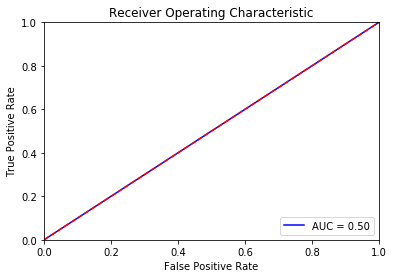

In [12]:
#ROC Curve for SVM Model
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf1.predict_proba(xTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, pred1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

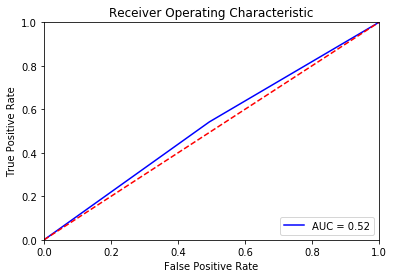

In [13]:
#ROC Curve for KNN Model
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf2.predict_proba(xTest)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(yTest, pred2)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()